# Cấu tạo của mạng nơ rơn nhiều tầng

# Cách hoạt động của mạng nơ ron nhiều tầng

## Lan truyền thẳng trong mạng nơ ron nhiều tầng


### Giả định Mô hình
Để đơn giản hóa việc phân tích toán học, chúng ta sử dụng các giả định sau:
* **Kiến trúc:** Mạng nơ-ron với một tầng ẩn (hidden layer).
* **Bias:** Không sử dụng tham số bias (độ lệch) trong các lớp.
* **Input:** Một mẫu dữ liệu đơn lẻ $\mathbf{x}$.

---

### 1. Tầng Ẩn: Biến đổi Tuyến tính
Vectơ đầu vào $\mathbf{x}$ trải qua một phép biến đổi tuyến tính thông qua ma trận trọng số $\mathbf{W}^{(1)}$ của tầng ẩn.

$$
\mathbf{z} = \mathbf{W}^{(1)}\mathbf{x}
$$

* **$\mathbf{x}$**: Vectơ đầu vào (đặc trưng).
* **$\mathbf{W}^{(1)}$**: Tham số trọng số của lớp ẩn.
* **$\mathbf{z}$**: Biến trung gian (giá trị trước kích hoạt).

In [ ]:
import numpy as np

# Dữ liệu ví dụ
x = np.array([1.2, -0.7, 0.5])
W1 = np.array([
    [0.2, -0.5, 1.0],
    [1.5,  0.3, -0.2],
    [-0.3, 0.8, 0.7],
    [0.6, -1.2, 0.4]
])

# Hàm hiển thị tính toán từng phần tử z_i
def detailed_matvec(W, x):
    assert W.shape[1] == x.shape[0], "Kích thước không khớp"
    z = np.zeros(W.shape[0])
    for i, row in enumerate(W):
        # tính từng tích w_ij * x_j
        terms = []
        for j, w_ij in enumerate(row):
            prod = w_ij * x[j]
            terms.append((w_ij, x[j], prod))
        # in chi tiết các tích
        expr_parts = []
        for (w_ij, x_j, prod) in terms:
            # định dạng đẹp: ví dụ "0.2 * 1.2 = 0.24"
            expr_parts.append(f"{w_ij:.4g}*{x_j:.4g}={prod:.4g}")
        # tính tổng các tích
        sum_value = sum(prod for (_, _, prod) in terms)
        z[i] = sum_value

        # in ra dòng chi tiết cho z_i
        print(f"z[{i}] = ", " + ".join(expr_parts), f" = {sum_value:.4g}")
    return z

# Chạy và in kết quả
z = detailed_matvec(W1, x)

print("Input x:", x)
print("Weight matrix W1:\n", W1)
print("Intermediate vector z:", z)


z[0] =  0.2*1.2=0.24 + -0.5*-0.7=0.35 + 1*0.5=0.5  = 1.09
z[1] =  1.5*1.2=1.8 + 0.3*-0.7=-0.21 + -0.2*0.5=-0.1  = 1.49
z[2] =  -0.3*1.2=-0.36 + 0.8*-0.7=-0.56 + 0.7*0.5=0.35  = -0.57
z[3] =  0.6*1.2=0.72 + -1.2*-0.7=0.84 + 0.4*0.5=0.2  = 1.76
Input x: [ 1.2 -0.7  0.5]
Weight matrix W1:
 [[ 0.2 -0.5  1. ]
 [ 1.5  0.3 -0.2]
 [-0.3  0.8  0.7]
 [ 0.6 -1.2  0.4]]
Intermediate vector z: [ 1.09  1.49 -0.57  1.76]


### 2. Lớp Ẩn: Hàm Kích hoạt
Biến trung gian $\mathbf{z}$ được đưa qua một hàm kích hoạt phi tuyến $\phi$ (ví dụ: ReLU, Sigmoid).

$$
\mathbf{h} = \phi(\mathbf{z}) \tag{5.3.2}
$$

* **$\phi$**: Hàm kích hoạt (Activation function).
* **$\mathbf{h}$**: Vectơ kích hoạt lớp ẩn (đầu ra thực tế của lớp ẩn).


In [ ]:
import numpy as np

# ---------- Input x ----------
x = np.array([1.2, -0.7, 0.5])

# ---------- Hidden layer weights ----------
W1 = np.array([
    [0.2, -0.5, 1.0],
    [1.5,  0.3, -0.2],
    [-0.3, 0.8, 0.7],
    [0.6, -1.2, 0.4]
])

# === Step 1: Linear transformation z = W1 * x ===
def detailed_matvec(W, x):
    z = np.zeros(W.shape[0])
    for i, row in enumerate(W):
        products = [row[j] * x[j] for j in range(len(x))]
        print(f"z[{i}] = ", " + ".join([f"{row[j]}*{x[j]}={products[j]}"
                                        for j in range(len(x))]),
              f" = {sum(products)}")
        z[i] = sum(products)
    return z

z = detailed_matvec(W1, x)

print("\nVector z:", z)

# === Step 2: Activation h = phi(z) (ReLU example) ===
def relu(x):
    return np.maximum(0, x)

print("\n=== Activation (ReLU) ===")
h = relu(z)

# In từng phép tính ReLU
for i, zi in enumerate(z):
    activated = max(0, zi)
    print(f"h[{i}] = ReLU(z[{i}] = {zi}) = {activated}")

print("\nVector h:", h)


z[0] =  0.2*1.2=0.24 + -0.5*-0.7=0.35 + 1.0*0.5=0.5  = 1.0899999999999999
z[1] =  1.5*1.2=1.7999999999999998 + 0.3*-0.7=-0.21 + -0.2*0.5=-0.1  = 1.4899999999999998
z[2] =  -0.3*1.2=-0.36 + 0.8*-0.7=-0.5599999999999999 + 0.7*0.5=0.35  = -0.57
z[3] =  0.6*1.2=0.72 + -1.2*-0.7=0.84 + 0.4*0.5=0.2  = 1.76

Vector z: [ 1.09  1.49 -0.57  1.76]

=== Activation (ReLU) ===
h[0] = ReLU(z[0] = 1.0899999999999999) = 1.0899999999999999
h[1] = ReLU(z[1] = 1.4899999999999998) = 1.4899999999999998
h[2] = ReLU(z[2] = -0.57) = 0
h[3] = ReLU(z[3] = 1.76) = 1.76

Vector h: [1.09 1.49 0.   1.76]


### 3. Tính toán Lớp Đầu ra
Đầu ra của lớp ẩn $\mathbf{h}$ trở thành đầu vào cho lớp tiếp theo. Chúng ta tính toán đầu ra cuối cùng $\mathbf{o}$ bằng cách sử dụng trọng số lớp đầu ra $\mathbf{W}^{(2)}$.

$$
\mathbf{o} = \mathbf{W}^{(2)}\mathbf{h} \tag{5.3.3}
$$

* **$\mathbf{W}^{(2)}$**: Tham số trọng số của lớp đầu ra.
* **$\mathbf{o}$**: Biến lớp đầu ra (vectơ dự đoán).

In [ ]:
# ---- Hidden activation vector từ phần trước ----
h = np.array([1.09, 1.49, 0.0, 1.76])

# ---- Trọng số lớp đầu ra (ví dụ) ----
# Giả sử lớp đầu ra có 2 neuron
# => W2 kích thước (2, 4)
W2 = np.array([
    [0.4,  -0.3, 0.8,  1.2],
    [-1.1,  0.5, 0.2, -0.4]
])

# Hàm mô phỏng từng phép tính ma trận-vectơ
def detailed_output(W, h):
    o = np.zeros(W.shape[0])
    for i, row in enumerate(W):
        products = [row[j] * h[j] for j in range(len(h))]
        expr = " + ".join([f"{row[j]}*{h[j]}={products[j]:.4g}"
                           for j in range(len(h))])
        total = sum(products)
        o[i] = total
        print(f"o[{i}] = {expr} = {total:.4g}")
    return o

# Tính output
print("=== Output layer computation ===")
o = detailed_output(W2, h)

print("\nVector o:", o)


=== Output layer computation ===
o[0] = 0.4*1.09=0.436 + -0.3*1.49=-0.447 + 0.8*0.0=0 + 1.2*1.76=2.112 = 2.101
o[1] = -1.1*1.09=-1.199 + 0.5*1.49=0.745 + 0.2*0.0=0 + -0.4*1.76=-0.704 = -1.158

Vector o: [ 2.101 -1.158]


### 4. Tính Hàm Mất mát (Loss)
Chúng ta tính toán thành phần lỗi $L$ bằng cách so sánh dự đoán $\mathbf{o}$ của mạng với nhãn thực tế $y$.

$$
L = l(\mathbf{o}, y) \tag{5.3.4}
$$

* **$y$**: Nhãn thực tế (True label) của mẫu dữ liệu.
* **$l$**: Hàm mất mát (ví dụ: Cross-Entropy, MSE).


In [ ]:
o = np.array([2.101, -1.158])

# Vector label y (ví dụ)
y = np.array([2, -1])

# Sai số từng phần tử
diff = o - y

# MSE Loss = 1/2 * sum((o - y)^2)
L = 0.5 * np.sum(diff ** 2)

print("o =", o)
print("y =", y)
print("Sai số từng phần tử:", diff)
print("Loss MSE =", L)

o = [ 2.101 -1.158]
y = [ 2 -1]
Sai số từng phần tử: [ 0.101 -0.158]
Loss MSE = 0.017582499999999987



### 5. Thành phần Chính quy hóa (Regularization)
Để ngăn chặn hiện tượng quá khớp (overfitting), một thành phần chính quy hóa $s$ được thêm vào. Công thức dưới đây sử dụng **Chuẩn Frobenius** (tương đương với L2 regularization hay Weight decay) để phạt các trọng số lớn.

$$
s = \frac{\lambda}{2} \left( \|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2 \right) \tag{5.3.5}
$$

* **$\lambda$**: Siêu tham số Regularization (kiểm soát mức độ phạt).
* **$\|\cdot\|_F$**: Chuẩn Frobenius (căn bậc hai của tổng bình phương các phần tử trong ma trận).


#### Tại sao cần chính quy hóa (Regularization)?

Trong quá trình huấn luyện mạng nơ-ron, mô hình thường có xu hướng:

- **Ghi nhớ** dữ liệu huấn luyện thay vì **học quy luật tổng quát**.
- Dự đoán rất tốt trên tập train nhưng kém trên dữ liệu mới → gọi là **quá khớp (overfitting)**.

Hiện tượng này xảy ra chủ yếu vì:

1. **Trọng số trở nên quá lớn**, làm mô hình phản ứng mạnh với nhiễu.
2. **Mô hình quá linh hoạt**, có thể biểu diễn những hàm phức tạp không cần thiết.

---


###  Giữ trọng số nhỏ (Weight Shrinkage)

Thành phần chính quy hóa:

$$ s = \frac{\lambda}{2} \left( \|W^{(1)}\|_F^2 + \|W^{(2)}\|_F^2 \right)$$

sẽ **phạt các trọng số lớn**, buộc mô hình học những biểu diễn đơn giản hơn.

### 2️⃣ Giảm độ phức tạp của mô hình

Regularization giúp mô hình:

- tránh ôm sát dữ liệu train,
- chỉ học ra phần thông tin quan trọng,
- giảm khả năng học theo nhiễu.

### 3️⃣ Tăng khả năng tổng quát hóa (Generalization)

Mô hình được chính quy hóa hoạt động ổn định hơn trên dữ liệu chưa từng thấy.

### 4️⃣ Ổn định quá trình tối ưu

Regularization làm cho:

- gradient “mượt” hơn,
- giảm dao động mạnh trong quá trình học,
- giúp mô hình hội tụ tốt hơn.

In [ ]:
lambda_reg = 0.1

def frobenius_step_by_step(W, name):
    print(f"\n========== TÍNH ||{name}||_F^2 ==========")
    total = 0.0
    rows, cols = W.shape

    for i in range(rows):
        for j in range(cols):
            val = W[i, j]
            sq = val ** 2
            total += sq
            print(f"{name}[{i},{j}] = {val:6.3f} → bình phương = {sq:7.4f} → tích lũy = {total:8.4f}")

    print(f">>> Tổng ||{name}||_F^2 = {total:.4f}")
    return total


# Tính từng phần ma trận
W1_norm_sq = frobenius_step_by_step(W1, "W1")
W2_norm_sq = frobenius_step_by_step(W2, "W2")

# Regularization term
s = (lambda_reg / 2) * (W1_norm_sq + W2_norm_sq)

print("\n========== TÍNH REGULARIZATION ==========")
print(f"s = (λ / 2) * (||W1||_F^2 + ||W2||_F^2)")
print(f"  = (0.1 / 2) * ({W1_norm_sq:.4f} + {W2_norm_sq:.4f})")
print(f"  = 0.05 * ({W1_norm_sq + W2_norm_sq:.4f})")
print(f"  → Regularization = {s:.6f}")


========== TÍNH ||W1||_F^2 ==========
W1[0,0] =  0.200 → bình phương =  0.0400 → tích lũy =   0.0400
W1[0,1] = -0.500 → bình phương =  0.2500 → tích lũy =   0.2900
W1[0,2] =  1.000 → bình phương =  1.0000 → tích lũy =   1.2900
W1[1,0] =  1.500 → bình phương =  2.2500 → tích lũy =   3.5400
W1[1,1] =  0.300 → bình phương =  0.0900 → tích lũy =   3.6300
W1[1,2] = -0.200 → bình phương =  0.0400 → tích lũy =   3.6700
W1[2,0] = -0.300 → bình phương =  0.0900 → tích lũy =   3.7600
W1[2,1] =  0.800 → bình phương =  0.6400 → tích lũy =   4.4000
W1[2,2] =  0.700 → bình phương =  0.4900 → tích lũy =   4.8900
W1[3,0] =  0.600 → bình phương =  0.3600 → tích lũy =   5.2500
W1[3,1] = -1.200 → bình phương =  1.4400 → tích lũy =   6.6900
W1[3,2] =  0.400 → bình phương =  0.1600 → tích lũy =   6.8500
>>> Tổng ||W1||_F^2 = 6.8500

========== TÍNH ||W2||_F^2 ==========
W2[0,0] =  0.400 → bình phương =  0.1600 → tích lũy =   0.1600
W2[0,1] = -0.300 → bình phương =  0.0900 → tích lũy =   0.2500
W2[0,2] =  

### 6. Hàm Mục tiêu (Objective Function)
**Hàm mục tiêu** $J$ (hay loss đã được chính quy hóa) là tổng của lỗi dự đoán và thành phần chính quy hóa.

$$
J = L + s \tag{5.3.6}
$$

> **Mục tiêu:** Quá trình huấn luyện nhằm mục đích giảm thiểu giá trị $J$ bằng cách điều chỉnh $\mathbf{W}^{(1)}$ và $\mathbf{W}^{(2)}$.

In [ ]:
print("\n=== TÍNH HÀM MỤC TIÊU J = L + s ===")
J = L + s
print("J =", J)


=== TÍNH HÀM MỤC TIÊU J = L + s ===
J = 0.5595825000000001




---

## 🔄 Luồng Biểu đồ Tính toán

Dòng chảy dữ liệu trong quá trình lan truyền xuôi có thể được hình dung như sau:

```mermaid
graph LR
    Input(Input x) --> Linear1[z = W1*x]
    Linear1 --> Activation[h = phi(z)]
    Activation --> Linear2[o = W2*h]
    Linear2 --> LossCalc[Loss L]
    
    Reg[Regularization s] --> J((Objective Function J))
    LossCalc --> J
    
    style J fill:#f9f,stroke:#333,stroke-width:2px
    style Input fill:#bbf,stroke:#333,stroke-width:2px

#Ứng dụng mạng nơ ron nhiều tầng

# **HIỆN THỰC**

## 1. Problem Definition: XOR Classification
- XOR (Exclusive OR): là một phép toán nhị phân cho ra kết quả 1 khi các giá trị đầu vào khác nhau và 0 khi chúng giống nhau.
### Tại sao phép toán XOR lại quan trọng?

- **Không thể phân tách tuyến tính:** Không thể vẽ một đường thẳng duy nhất để phân tách các lớp
- **Yêu cầu tính phi tuyến tính:** Cần các lớp ẩn với các hàm kích hoạt

### Tại sao MLP có thể giải quyết bài toán XOR

Một MLP 2 lớp với hàm kích hoạt phi tuyến tính có thể:

- Lớp ẩn học cách biến đổi không gian
- Lớp đầu ra kết hợp các đặc trưng đã được biến đổi
- Kết quả: Đường ranh giới quyết định phi tuyến tính

## 2. Implement from scratch
- Khởi tạo tham số mô hình (W, b)  
- Xây dựng forward  
- Xây dựng backward  
- Training loop + loss + update  

## 3. Các vấn đề cần quan tâm

### 3.1 Hyperparameter Tuning
- Số lượng neuron trong hidden layer (num_hiddens)  
- Số lượng hidden layers  
- Learning rate  
- Tối ưu đồng thời nhiều hyperparameters  
- Chiến lược tìm kiếm: grid search nhỏ, random search, Bayesian optimization,…

### 3.2 Model Architecture & Activation
- Thử activation khác nhau: ReLU, Sigmoid, Tanh  
- Thử weight initialization (random, Xavier, He)  

### 3.3 Training & Computational Issues
- So sánh tốc độ framework vs implementation thuần NumPy  
- Memory footprint  
- Forward + Backprop

### 3.4 Best Practices / Strategy
- Random search hiệu quả hơn grid search  
- Log kết quả  
- Quan sát trade-off accuracy vs training time vs memory  


## CÀI ĐẶT VÀ CHUẨN BỊ MÔI TRƯỜNG

In [ ]:
# %% Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from itertools import product

# For comparison with framework
import torch
import torch.nn as nn
import torch.optim as optim

np.random.seed(42)
torch.manual_seed(42)

## KHỞI TẠO BỘ DỮ LIỆU CHO XOR

In [ ]:
# XOR Dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)

y = np.array([[0],
              [1],
              [1],
              [0]], dtype=np.float32)

print("XOR Dataset:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nData:")
for i in range(len(X)):
    print(f"  Input: {X[i]} → Output: {y[i][0]}")

XOR Dataset:
X shape: (4, 2)
y shape: (4, 1)

Data:
  Input: [0. 0.] → Output: 0.0
  Input: [0. 1.] → Output: 1.0
  Input: [1. 0.] → Output: 1.0
  Input: [1. 1.] → Output: 0.0


## TRỰC QUAN HOÁ BÀI TOÁN XOR

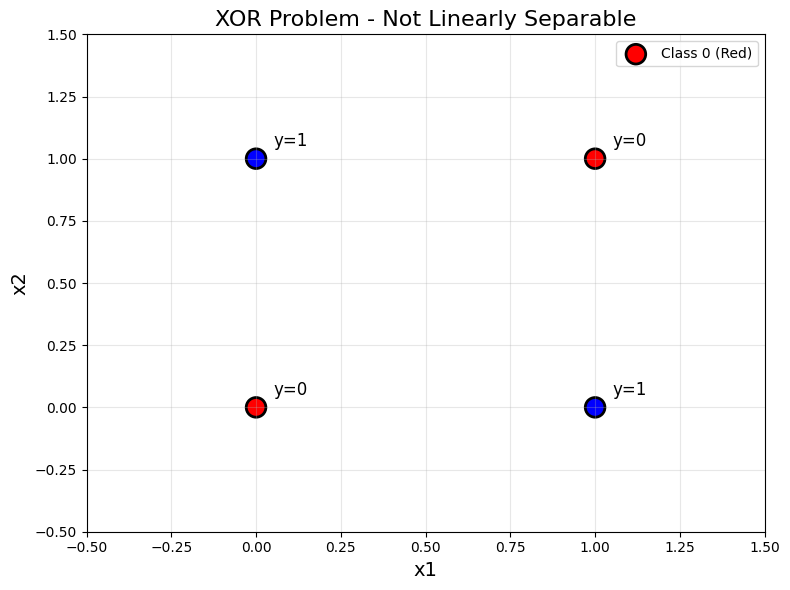

Red points: (0,0) and (1,1) → Output 0
Blue points: (0,1) and (1,0) → Output 1
Notice: No single line can separate red from blue!


In [ ]:
# Visualize XOR Problem
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'blue' for label in y.flatten()]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=200, edgecolors='black', linewidths=2)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.title('XOR Problem - Not Linearly Separable', fontsize=16)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Add labels
for i in range(len(X)):
    plt.text(X[i, 0] + 0.05, X[i, 1] + 0.05, f"y={int(y[i][0])}", fontsize=12)

plt.legend(['Class 0 (Red)', 'Class 1 (Blue)'])
plt.tight_layout()
plt.show()

print("Red points: (0,0) and (1,1) → Output 0")
print("Blue points: (0,1) and (1,0) → Output 1")
print("Notice: No single line can separate red from blue!")

## HIỆN THỰC CÁC HÀM ACTIVATION
Các hàm được hiện thực bao gồm:
- relu và relu_derivative
- sigmoid và sigmoid_derivative
- tanh và tanh_derivative
- softmax

Giải thích:
- Hàm `np.clip()` trong định nghĩa của hàm sigmoid được sử dụng để giới hạn các giá trị của `x` để ngăn chặn tràn số, khi giá trị của `x` quá lớn hoặc quá nhỏ, kết quả của `np.exp(-x)` có thể trở thành một số rất lớn hoặc rất nhỏ, và trong ngôn ngữ lập trình, điều này có thể gây tràn số, làm sai lệch kết quả tính toán.

In [ ]:
class Activation:
    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    @staticmethod
    def sigmoid_derivative(x):
        s = Activation.sigmoid(x)
        return s * (1 - s)

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

## HIỆN THỰC CÁC HÀM KHỞI TẠO TRỌNG SỐ
Các hàm được hiện thực bao gồm:
### 1. random_init
- Khởi tạo ngẫu nhiên từ phân phối chuẩn các trọng số với giá trị nhỏ bằng hàm `np.random.randn()`
- Kết quả trả về sẽ là một ma trận các giá trị trọng số `W` có kích thước nhận vào `*shape`

### 2. xavier_init
- Giữ variance của activation và gradient ổn định qua các layers, giúp training ổn định hơn.
- Thường được sử dụng cho hàm kích hoạt Sigmoid hoặc Tanh.

### 3. he_init
- Giúp giải quyết vấn đề vanishing/exploding gradient trong mạng nơ-ron, đặc biệt khi sử dụng hàm kích hoạt ReLU.
- Khởi tạo trọng số từ một phân phối ngẫu nhiên với variance được tính toán dựa trên số lượng đầu vào `fan_in` của lớp đó.


*Lưu ý:*
- Trọng số nên có mean gần 0 để tránh bias.
- Có std phù hợp để variance không quá lớn hoặc quá nhỏ.
- Chọn hàm init phù hợp với hàm kích hoạt.

In [ ]:
# %% 3. Weight Initialization Methods
class WeightInitializer:
    @staticmethod
    def random_init(shape):
        """Random initialization with small values"""
        return np.random.randn(*shape) * 0.01

    @staticmethod
    def xavier_init(shape):
        """Xavier/Glorot initialization"""
        fan_in, fan_out = shape[0], shape[1]
        limit = np.sqrt(6 / (fan_in + fan_out))
        return np.random.uniform(-limit, limit, shape)

    @staticmethod
    def he_init(shape):
        """He initialization (good for ReLU)"""
        fan_in = shape[0]
        std = np.sqrt(2 / fan_in)
        return np.random.randn(*shape) * std


# Test initialization
test_shape = (2, 4)
print("="*60)
print("Weight Initialization Test (shape: 2x4)")
print("="*60)

for method_name in ['random', 'xavier', 'he']:
    init_func = getattr(WeightInitializer, f'{method_name}_init')
    weights = init_func(test_shape)

    print(f"\n{method_name.upper()} initialization:")
    print(f"  Mean: {weights.mean():.6f}")
    print(f"  Std:  {weights.std():.6f}")
    print(f"  Min:  {weights.min():.6f}")
    print(f"  Max:  {weights.max():.6f}")

    if abs(weights.mean()) > 0.1:
        print(f"WARNING: Mean is too far from 0!")
    else:
        print(f"Mean is close to 0 (good!)")

Weight Initialization Test (shape: 2x4)

RANDOM initialization:
  Mean: 0.002454
  Std:  0.008316
  Min:  -0.004876
  Max:  0.020754
Mean is close to 0 (good!)

XAVIER initialization:
  Mean: 0.009878
  Std:  0.341040
  Min:  -0.397244
  Max:  0.633199
Mean is close to 0 (good!)

HE initialization:
  Mean: -0.075282
  Std:  1.108530
  Min:  -2.211135
  Max:  1.143754
Mean is close to 0 (good!)


## HIỆN THỰC MLP
Thành phần của một đối tượng MLP:
### 1. Hàm khởi tạo đối tượng: Khởi tạo mạng neural với các tham số và trọng số ban đầu
Các tham số đầu vào:
- `input_size`: Kích thước input (số features đầu vào, `XOR = 2`)
- `hidden_size`: Các lớp ẩn (số nơ-ron trong hidden layer).
- `output_size`: Số neurons output (XOR = 1 cho binary classification)
- `activation`: Loại hàm kích hoạt ('relu' - mặc định, 'sigmoid', và 'tanh').
- `init_method`: Phương pháp khởi tạo trọng số ('random', 'xavier', 'he' - mặc định)

Các Bước Thực Hiện:

**Bước 1:** Lưu tên activation và init method:
```python
self.activation_name = activation
self.init_method = init_method

```
**Bước 2:** Chọn hàm activation và derivative:
```python
if activation == 'relu':
self.activation = Activation.relu
self.activation_derivative = Activation.relu_derivative
```

- Lưu cả hàm chính và đạo hàm (cần cho backprop)

**Bước 3:** Khởi tạo trọng số và bias:
```python
self.W1 = init_func((input_size, hidden_size))   # Ma trận 2×4
self.b1 = np.zeros((1, hidden_size))             # Vector 1×4
self.W2 = init_func((hidden_size, output_size))  # Ma trận 4×1
self.b2 = np.zeros((1, output_size))             # Scalar 1×1
```
- W1: Trọng số từ input → hidden
- b1: Bias cho hidden layer
- W2: Trọng số từ hidden → output
- b2: Bias cho output layer

---
### 2. forward(X) - Lan Truyền Xuôi: Tính toán output của mạng từ input

Các tham số đầu vào:
- `X`: Ma trận input shape (n_samples, n_features)
    - Với XOR: (4, 2) - 4 samples, 2 features

Các bước thực hiện:

**Bước 1: Hidden Layer**
```python
self.z1 = X @ self.W1 + self.b1
```
- **Công thức toán học:** z₁ = X·W₁ + b₁
- **Kích thước:** (4, 2) @ (2, 4) + (1, 4) = (4, 4)
- **Ý nghĩa:** Linear combination của inputs

```python
self.a1 = self.activation(self.z1)
```
- **Công thức:** a₁ = f(z₁)
- **Kích thước:** (4, 4)
- **Ý nghĩa:** Áp dụng non-linearity (ReLU/Sigmoid/Tanh)

**Bước 2: Output Layer**
```python
self.z2 = self.a1 @ self.W2 + self.b2
```
- **Công thức:** z₂ = a₁·W₂ + b₂
- **Kích thước:** (4, 4) @ (4, 1) + (1, 1) = (4, 1)

```python
self.a2 = Activation.sigmoid(self.z2)
```
- **Công thức:** a₂ = σ(z₂)
- **Kích thước:** (4, 1)
- **Ý nghĩa:** Sigmoid để có output [0, 1] cho binary classification

**Output:**
- `self.a2`: Predictions shape (4, 1) với giá trị trong [0, 1]

**Lưu ý:**
- Lưu z1, a1, z2, a2 vào `self` để dùng cho backpropagation

---
### 3. backward(X, y, learning_rate) - Lan Truyền Ngược: Tính gradient và cập nhật trọng số

Các tham số đầu vào:
- `X`: Input data (4, 2)
- `y`: True labels (4, 1)
- `learning_rate`: Tốc độ học (vd: 0.1)

Các Bước Chi Tiết:

**Bước 0:** Chuẩn bị
```python
m = X.shape[0]  # Số samples = 4
```

**Bước 1:** Gradient của Output Layer

```python
dz2 = self.a2 - y
```
- Công thức toán học: ∂L/∂z₂ = a₂ - y
- Giải thích: Với Sigmoid + Binary Cross Entropy, đạo hàm rất đơn giản
- Kích thước: (4, 1)

```python
dW2 = self.a1.T @ dz2 / m
```
- Công thức: ∂L/∂W₂ = (1/m)·a₁ᵀ·∂z₂
- Kích thước: (4, 4)ᵀ @ (4, 1) / 4 = (4, 1)
- Chia m: Lấy trung bình gradient qua tất cả samples

```python
db2 = np.sum(dz2, axis=0, keepdims=True) / m
```
- Công thức: ∂L/∂b₂ = (1/m)·Σ ∂z₂
- Kích thước: (1, 1)
- Sum qua axis=0: Cộng gradient của tất cả samples

**Bước 2:** Gradient của Hidden Layer

```python
da1 = dz2 @ self.W2.T
```
    - Công thức: ∂L/∂a₁ = ∂z₂·W₂ᵀ
    - Kích thước: (4, 1) @ (1, 4) = (4, 4)
    - Ý nghĩa: Lan truyền error từ output về hidden

```python
dz1 = da1 * self.activation_derivative(self.z1)
```
    - Công thức: ∂L/∂z₁ = ∂a₁ ⊙ f'(z₁)
    - Kích thước: (4, 4) ⊙ (4, 4) = (4, 4)
    - Element-wise multiplication: Chain rule của calculus
    - f'(z₁): Đạo hàm của ReLU/Sigmoid/Tanh

```python
dW1 = X.T @ dz1 / m
```
- Công thức: ∂L/∂W₁ = (1/m)·Xᵀ·∂z₁
- Kích thước: (2, 4)ᵀ @ (4, 4) / 4 = (2, 4)

```python
db1 = np.sum(dz1, axis=0, keepdims=True) / m
```
- Công thức: ∂L/∂b₁ = (1/m)·Σ ∂z₁
- Kích thước: (1, 4)

**Bước 3:** Cập Nhật Trọng Số (Gradient Descent)

```python
self.W1 -= learning_rate * dW1
self.b1 -= learning_rate * db1
self.W2 -= learning_rate * dW2
self.b2 -= learning_rate * db2
```
- Công thức: θ_new = θ_old - α·∇θ
- α (learning_rate): Điều chỉnh bước nhảy
- Trừ vì: Gradient chỉ hướng tăng loss, ta muốn giảm loss

---

### 4. train(X, y, epochs, learning_rate, verbose) - Vòng Lặp Huấn Luyện: Huấn luyện mạng qua nhiều epochs

Các tham số đầu vào:
- `X`: Training data (4, 2)
- `y`: Labels (4, 1)
- `epochs`: Số vòng lặp (vd: 3000)
- `learning_rate`: Tốc độ học (vd: 0.1)
- `verbose`: In progress hay không

Quy trình của 1 Epoch:

1. **Forward Pass:**
   ```python
   y_pred = self.forward(X)
   ```
   - Tính output từ input

2. **Calculate Loss (Binary Cross Entropy):**
   ```python
   loss = -np.mean(y * np.log(y_pred + 1e-8) +
                   (1 - y) * np.log(1 - y_pred + 1e-8))
   ```
   - **Công thức BCE:** -[y·log(ŷ) + (1-y)·log(1-ŷ)]
   - **1e-8:** Tránh log(0) = -∞
   - **np.mean:** Trung bình loss của tất cả samples

3. **Calculate Accuracy:**
   ```python
   predictions = (y_pred >= 0.5).astype(float)
   accuracy = np.mean(predictions == y)
   ```
   - Threshold 0.5: >= 0.5 → class 1, < 0.5 → class 0
   - So sánh với y để tính % đúng

4. **Backward Pass:**
   ```python
   self.backward(X, y, learning_rate)
   ```
   - Cập nhật trọng số

5. **Log Progress:**
   - In loss và accuracy mỗi 500 epochs

**Output:**
- `losses`: List chứa loss của mỗi epoch
- `accuracies`: List chứa accuracy của mỗi epoch

---

### 5. predict(X) - Dự đoán class cho input mới

Các tham số đầu vào:
- `X`: Input data shape (n_samples, 2)

Quá Trình:
```python
y_pred = self.forward(X)           # Forward pass → probability
return (y_pred >= 0.5).astype(int) # Threshold → binary class
```

**Output:**
- Ma trận (n_samples, 1) với giá trị 0 hoặc 1

---

In [ ]:
class MLPFromScratch:
    def __init__(self, input_size, hidden_size, output_size,
                 activation='relu', init_method='he'):
        """
        Simple MLP with one hidden layer for XOR

        Args:
            input_size: number of input features (2 for XOR)
            hidden_size: number of hidden neurons
            output_size: number of output neurons (1 for XOR)
            activation: 'relu', 'sigmoid', or 'tanh'
            init_method: 'random', 'xavier', or 'he'
        """
        self.activation_name = activation
        self.init_method = init_method

        # Choose activation function
        if activation == 'relu':
            self.activation = Activation.relu
            self.activation_derivative = Activation.relu_derivative
        elif activation == 'sigmoid':
            self.activation = Activation.sigmoid
            self.activation_derivative = Activation.sigmoid_derivative
        elif activation == 'tanh':
            self.activation = Activation.tanh
            self.activation_derivative = Activation.tanh_derivative

        # Initialize weights
        init_func = getattr(WeightInitializer, f'{init_method}_init')

        self.W1 = init_func((input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = init_func((hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        """Forward pass"""
        # Hidden layer
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.activation(self.z1)

        # Output layer (sigmoid for binary classification)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = Activation.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, learning_rate):
        """Backward pass with gradient descent"""
        m = X.shape[0]

        # Output layer gradient (sigmoid + BCE)
        dz2 = self.a2 - y
        dW2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden layer gradient
        da1 = dz2 @ self.W2.T
        dz1 = da1 * self.activation_derivative(self.z1)
        dW1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate, verbose=True):
        """Training loop"""
        losses = []
        accuracies = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Calculate loss (Binary Cross Entropy)
            loss = -np.mean(y * np.log(y_pred + 1e-8) +
                           (1 - y) * np.log(1 - y_pred + 1e-8))
            losses.append(loss)

            # Calculate accuracy
            predictions = (y_pred >= 0.5).astype(float)
            accuracy = np.mean(predictions == y)
            accuracies.append(accuracy)

            # Backward pass
            self.backward(X, y, learning_rate)

            # Print progress
            if verbose and (epoch % 500 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:4d}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

        return losses, accuracies

    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)


## THỰC HIỆN HUẤN LUYỆN
### Khởi Tạo Model

```python
model = MLPFromScratch(input_size=2, hidden_size=4, output_size=1,
                       activation='relu', init_method='he')
```

**Cấu hình:**
- Architecture: 2 inputs → 4 hidden neurons → 1 output
- Activation: ReLU cho hidden layer, Sigmoid cho output
- Initialization: He (tối ưu cho ReLU)

### Training

```python
losses, accuracies = model.train(X, y, epochs=3000, learning_rate=0.1)
```

**Quá trình:**
1. Forward pass: Tính predictions
2. Tính loss (BCE) và accuracy
3. Backward pass: Tính gradients
4. Update weights: W ← W - α·∇W

### Testing

```python
predictions = model.predict(X)
```

- Forward pass qua trained model
- Apply threshold 0.5: ≥0.5 → class 1, <0.5 → class 0

### Kết Quả Mong Đợi

| Metric | Giá trị | Ý nghĩa |
|--------|---------|----------|
| Final Loss | < 0.05 | Model đã converge tốt |
| Accuracy | 100% | Perfect classification |
| Training time | ~1-2s | XOR rất nhỏ, train nhanh |

**Lý do chọn hyperparameters:**
- `hidden_size=4`: Đủ capacity cho XOR (minimum cần 2)
- `learning_rate=0.1`: Balance giữa stability và speed
- `epochs=3000`: Đảm bảo converge hoàn toàn

In [ ]:
# Train a baseline model
print("Training MLP on XOR problem...\n")

model = MLPFromScratch(
    input_size=2,
    hidden_size=4,
    output_size=1,
    activation='relu',
    init_method='he'
)

losses, accuracies = model.train(X, y, epochs=3000, learning_rate=0.1)

# Test predictions
print("\n" + "="*50)
print("Final Predictions:")
predictions = model.predict(X)
for i in range(len(X)):
    print(f"  Input: {X[i]} → Predicted: {predictions[i][0]}, True: {int(y[i][0])}")

final_accuracy = np.mean(predictions == y)
print(f"\nFinal Accuracy: {final_accuracy * 100:.1f}%")

Training MLP on XOR problem...

Epoch    0: Loss = 0.8147, Accuracy = 0.2500
Epoch  500: Loss = 0.4124, Accuracy = 1.0000
Epoch 1000: Loss = 0.0770, Accuracy = 1.0000
Epoch 1500: Loss = 0.0320, Accuracy = 1.0000
Epoch 2000: Loss = 0.0191, Accuracy = 1.0000
Epoch 2500: Loss = 0.0133, Accuracy = 1.0000
Epoch 2999: Loss = 0.0101, Accuracy = 1.0000

Final Predictions:
  Input: [0. 0.] → Predicted: 0, True: 0
  Input: [0. 1.] → Predicted: 1, True: 1
  Input: [1. 0.] → Predicted: 1, True: 1
  Input: [1. 1.] → Predicted: 0, True: 0

Final Accuracy: 100.0%


## TRỰC QUAN HOÁ QUÁ TRÌNH HUẤN LUYỆN

### Loss Curve (Trái) - Phân tích theo giai đoạn

- Giai đoạn 1: Epochs 0-200 (Giảm nhanh)
  - Loss giảm mạnh từ ~0.82 xuống ~0.69, cho thấy mô hình tiếp thu rất nhanh ở giai đoạn đầu.  
  - Đường loss dốc xuống rõ rệt, phản ánh việc trọng số đang được điều chỉnh mạnh.

- Giai đoạn 2: Epochs 200–800 (Giảm theo đường cong)
  - Từ ~0.69 đến ~0.10, loss giảm mượt và ổn định hơn.  
  - Đây là quá trình fine-tuning, mô hình đang tiến gần tới điểm tối ưu.

- Giai đoạn 3: Epochs 800–3000 (Giảm chậm và phẳng dần)
  - Loss giảm chậm từ ~0.10 xuống gần 0.02.  
  - Đường cong gần như phẳng, mô hình hầu như đã hội tụ hoàn toàn.

### Accuracy Curve (Phải) – Phân tích hành vi accuracy

- Tăng dần theo các bước nhảy rõ rệt
  - Accuracy tăng từ 0.25 → 0.5 → 0.75 cho đến khi đạt 1.0.  
  - Các bước tăng xảy ra khi mô hình học được các ranh giới quyết định quan trọng trong bài toán XOR.

- Ổn định hoàn toàn sau khoảng 500 epochs
  - Accuracy giữ mức 1.0 cho toàn bộ phần còn lại của quá trình training.  
  - Điều này cho thấy mô hình không chỉ hội tụ mà còn phân loại hoàn hảo toàn bộ tập huấn luyện.

### Đánh giá tổng quan

- Loss giảm đều và không có dao động, chứng tỏ cấu hình learning rate phù hợp.  
- Accuracy đạt 1.0 và ổn định rất sớm, mô hình giải được bài toán XOR hoàn chỉnh.  
- Loss cuối ~0.02 thể hiện quá trình training đạt chất lượng rất cao.

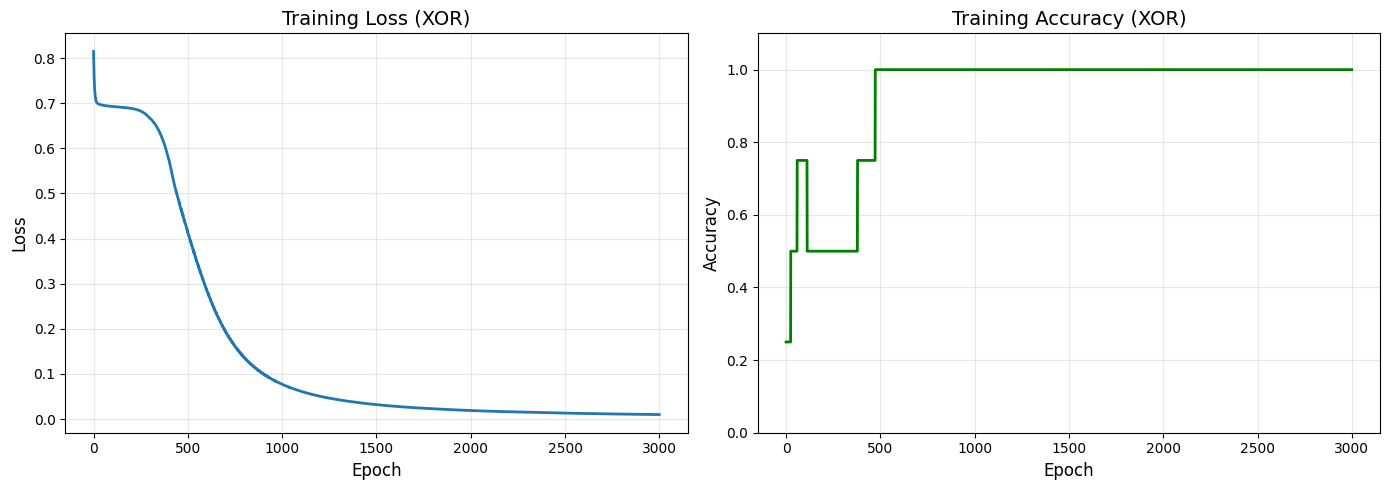

In [ ]:
# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
ax1.plot(losses, linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss (XOR)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Accuracy curve
ax2.plot(accuracies, linewidth=2, color='green')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Training Accuracy (XOR)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## THÍ NGHIỆM 1: SO SÁNH GIỮA CÁC HÀM KÍCH HOẠT
Thí nghiệm thực hiện việc huấn luyện và dự đoán đối với 3 hàm kích hoạt là `relu`, `sigmoid` và `tanh`.

Kết quả bao gồm giá trị mất mát cuối cùng, độ chính xác và thời gian huấn luyện của từng hàm kích hoạt.

In [ ]:
print("="*70)
print("Experiment 1: Comparing Activation Functions on XOR")
print("="*70)

activations = ['relu', 'sigmoid', 'tanh']
activation_results = {}

for act in activations:
    print(f"\nTraining with {act.upper()} activation...")

    model = MLPFromScratch(
        input_size=2,
        hidden_size=4,
        output_size=1,
        activation=act,
        init_method='he'
    )

    start_time = time.time()
    losses, accuracies = model.train(X, y, epochs=3000, learning_rate=0.1, verbose=False)
    train_time = time.time() - start_time

    activation_results[act] = {
        'losses': losses,
        'accuracies': accuracies,
        'time': train_time,
        'final_loss': losses[-1],
        'final_acc': accuracies[-1]
    }

    print(f"  Final Loss: {losses[-1]:.4f}")
    print(f"  Final Accuracy: {accuracies[-1]:.4f}")
    print(f"  Training time: {train_time:.3f}s")

print("\n" + "="*70)
print("Summary:")
print("="*70)
for act, results in activation_results.items():
    print(f"{act.upper():8s}: Acc = {results['final_acc']:.4f}, Loss = {results['final_loss']:.4f}, Time = {results['time']:.3f}s")

Experiment 1: Comparing Activation Functions on XOR

Training with RELU activation...
  Final Loss: 0.0061
  Final Accuracy: 1.0000
  Training time: 0.798s

Training with SIGMOID activation...
  Final Loss: 0.4951
  Final Accuracy: 1.0000
  Training time: 1.062s

Training with TANH activation...
  Final Loss: 0.0092
  Final Accuracy: 1.0000
  Training time: 1.049s

Summary:
RELU    : Acc = 1.0000, Loss = 0.0061, Time = 0.798s
SIGMOID : Acc = 1.0000, Loss = 0.4951, Time = 1.062s
TANH    : Acc = 1.0000, Loss = 0.0092, Time = 1.049s


## TRỰC QUAN HOÁ KẾT QUẢ GIỮA CÁC HÀM KÍCH HOẠT

Từ biểu đồ, ta có thể thấy cả ba hàm kích hoạt ReLU, Sigmoid và Tanh đều đạt accuracy 100% trên bài toán XOR.

Tuy nhiên, sự khác biệt nằm ở tốc độ hội tụ và mức độ tối ưu của loss. ReLU cho kết quả tốt nhất với loss rất thấp (0.0061) và thời gian train nhanh nhất, chứng tỏ khả năng học mạnh và ổn định. Tanh cũng đạt loss nhỏ (0.0092) nhưng chậm hơn một chút. Ngược lại, Sigmoid cho loss cao hơn nhiều (0.4951) và là hàm hoạt động kém nhất trong ba lựa chọn, dù cuối cùng vẫn đạt accuracy tối đa.

Điều này phản ánh đặc trưng của từng hàm kích hoạt về tốc độ học và khả năng tránh vanishing gradient.

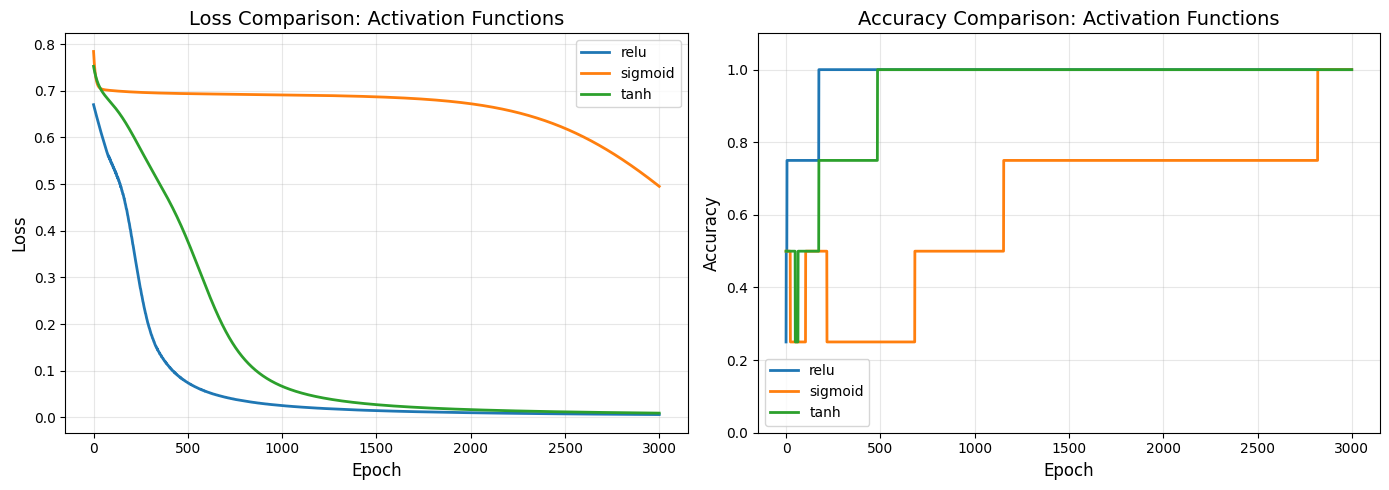

In [ ]:
# Visualize activation comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
for act, results in activation_results.items():
    ax1.plot(results['losses'], label=act, linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss Comparison: Activation Functions', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
for act, results in activation_results.items():
    ax2.plot(results['accuracies'], label=act, linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Accuracy Comparison: Activation Functions', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## THÍ NGHIỆM 2: KÍCH THƯỚC LỚP ẨN
Kết quả thí nghiệm cho thấy kích thước hidden layer ảnh hưởng mạnh đến tốc độ hội tụ và độ chính xác của mô hình khi học bài toán XOR.

- Với 2 và 4 neurons, loss giảm chậm và mô hình chỉ đạt accuracy khoảng 75%, cho thấy cấu trúc này không đủ phức tạp để tách tuyến tính bài toán XOR.

- Khi tăng lên 8 neurons, mô hình nhanh chóng hội tụ, loss tiến về gần 0 và accuracy đạt 100%, cho thấy hidden size này đủ năng lực biểu diễn tính phi tuyến của dữ liệu.
- Việc tiếp tục tăng số neurons lên 16 và 32 không cải thiện accuracy (vẫn 100%) nhưng giúp loss giảm nhanh hơn; bù lại số tham số tăng đáng kể và thời gian huấn luyện dao động nhẹ theo từng cấu hình.

Nhìn chung, từ 8 neurons trở lên là đủ để giải XOR hoàn chỉnh, các cấu hình lớn hơn chỉ làm tăng chi phí tính toán mà không mang lại lợi ích thêm về độ chính xác.

In [ ]:
print("="*70)
print("Experiment 2: Impact of Hidden Layer Size on XOR")
print("="*70)

hidden_sizes = [2, 4, 8, 16, 32]
hidden_results = {}

for hidden_size in hidden_sizes:
    print(f"\nTraining with {hidden_size} hidden neurons...")

    model = MLPFromScratch(
        input_size=2,
        hidden_size=hidden_size,
        output_size=1,
        activation='relu',
        init_method='he'
    )

    start_time = time.time()
    losses, accuracies = model.train(X, y, epochs=3000, learning_rate=0.1, verbose=False)
    train_time = time.time() - start_time

    # Count parameters
    num_params = (2 * hidden_size + hidden_size) + (hidden_size * 1 + 1)

    hidden_results[hidden_size] = {
        'losses': losses,
        'accuracies': accuracies,
        'time': train_time,
        'final_loss': losses[-1],
        'final_acc': accuracies[-1],
        'num_params': num_params
    }

    print(f"  Parameters: {num_params}")
    print(f"  Final Accuracy: {accuracies[-1]:.4f}")
    print(f"  Training time: {train_time:.3f}s")

print("\n" + "="*70)
print("Summary:")
print("="*70)
for h, results in hidden_results.items():
    print(f"Hidden={h:2d}: Acc={results['final_acc']:.4f}, Params={results['num_params']:3d}, Time={results['time']:.3f}s")

Experiment 2: Impact of Hidden Layer Size on XOR

Training with 2 hidden neurons...
  Parameters: 9
  Final Accuracy: 0.7500
  Training time: 0.337s

Training with 4 hidden neurons...
  Parameters: 17
  Final Accuracy: 0.7500
  Training time: 0.649s

Training with 8 hidden neurons...
  Parameters: 33
  Final Accuracy: 1.0000
  Training time: 0.523s

Training with 16 hidden neurons...
  Parameters: 65
  Final Accuracy: 1.0000
  Training time: 0.523s

Training with 32 hidden neurons...
  Parameters: 129
  Final Accuracy: 1.0000
  Training time: 0.603s

Summary:
Hidden= 2: Acc=0.7500, Params=  9, Time=0.337s
Hidden= 4: Acc=0.7500, Params= 17, Time=0.649s
Hidden= 8: Acc=1.0000, Params= 33, Time=0.523s
Hidden=16: Acc=1.0000, Params= 65, Time=0.523s
Hidden=32: Acc=1.0000, Params=129, Time=0.603s


## TRỰC QUAN HOÁ SỰ ẢNH HƯỞNG CỦA KÍCH THƯỚC LỚP ẨN

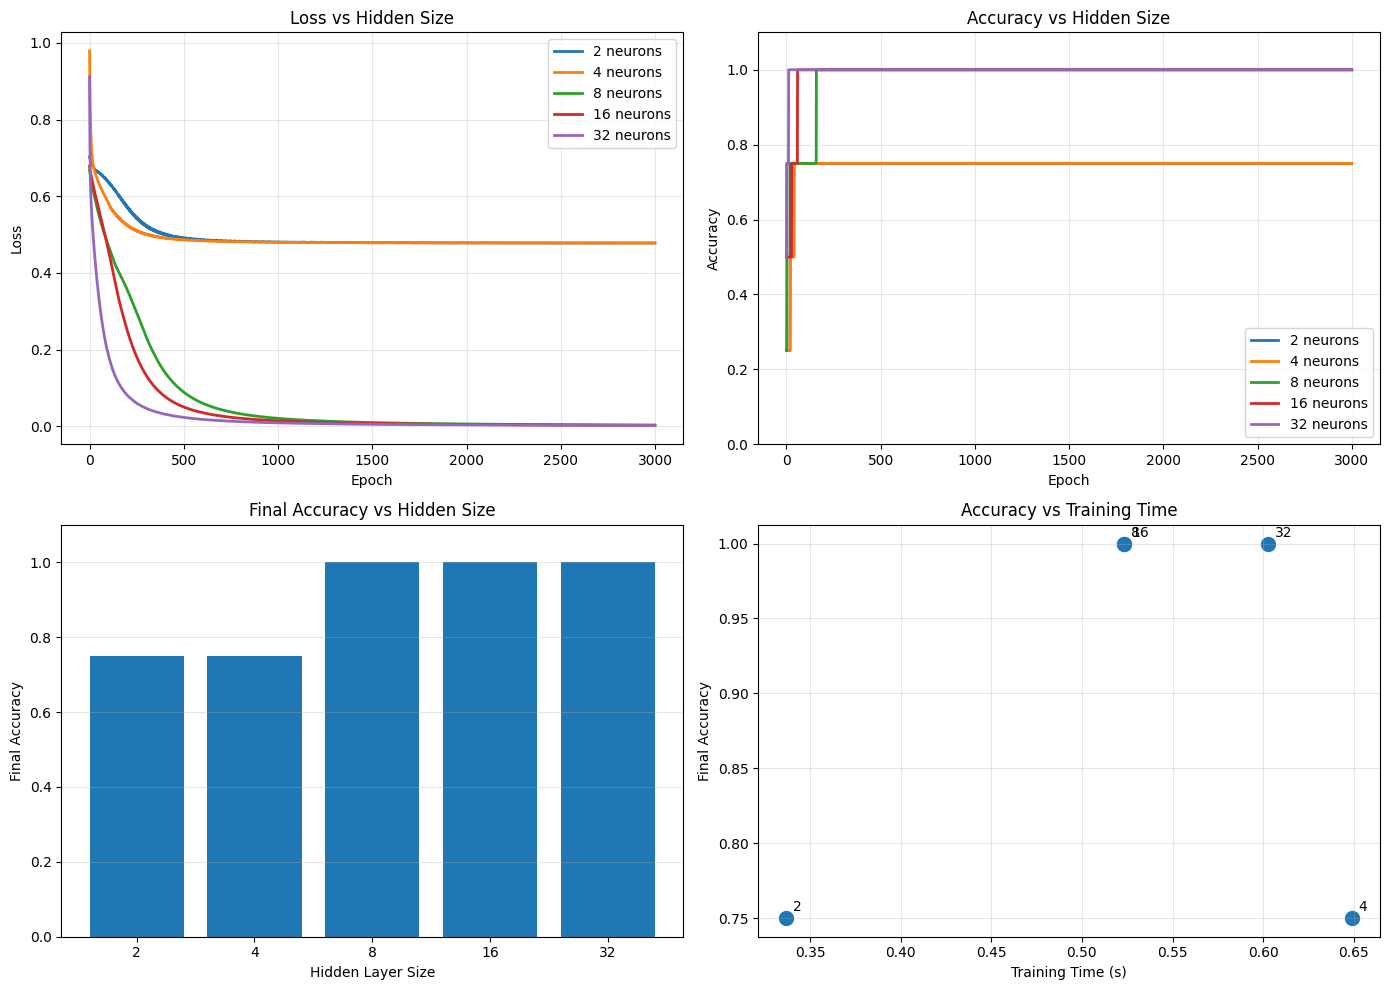

In [ ]:
# Visualize hidden size impact
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loss curves
ax = axes[0, 0]
for h, results in hidden_results.items():
    ax.plot(results['losses'], label=f'{h} neurons', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Hidden Size')
ax.legend()
ax.grid(True, alpha=0.3)

# Accuracy curves
ax = axes[0, 1]
for h, results in hidden_results.items():
    ax.plot(results['accuracies'], label=f'{h} neurons', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Hidden Size')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.1])

# Final accuracy bar plot
ax = axes[1, 0]
sizes = list(hidden_results.keys())
accs = [hidden_results[h]['final_acc'] for h in sizes]
ax.bar(range(len(sizes)), accs, tick_label=sizes)
ax.set_xlabel('Hidden Layer Size')
ax.set_ylabel('Final Accuracy')
ax.set_title('Final Accuracy vs Hidden Size')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.1])

# Training time vs accuracy
ax = axes[1, 1]
times = [hidden_results[h]['time'] for h in sizes]
ax.scatter(times, accs, s=100)
for i, h in enumerate(sizes):
    ax.annotate(f'{h}', (times[i], accs[i]), xytext=(5, 5), textcoords='offset points')
ax.set_xlabel('Training Time (s)')
ax.set_ylabel('Final Accuracy')
ax.set_title('Accuracy vs Training Time')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## THÍ NGHIỆM 3: ĐIỀU CHỈNH TỐC ĐỘ HỌC
Kết quả thí nghiệm cho thấy learning rate có tác động quyết định đến tốc độ hội tụ và chất lượng mô hình khi học bài toán XOR.
- Với `LR = 0.01`, loss giảm rất chậm (từ 0.75 xuống 0.35 sau 3000 epochs) và mặc dù đạt accuracy 100%, loss cuối còn cao (0.3494) cho thấy model chưa tối ưu hoàn toàn.
- `LR = 0.05` cải thiện đáng kể với loss giảm xuống 0.0133 và convergence ổn định hơn, đây là sự cân bằng tốt giữa tốc độ và stability.
- `LR = 0.1` cho kết quả tệ nhất với accuracy chỉ đạt 75% và loss cao (0.4777), cho thấy step size này khiến model bị stuck ở local minimum.
- Khi tăng lên `LR = 0.3, 0.5 và 1.0`, mô hình hội tụ cực nhanh (dưới 200 epochs), loss tiến về gần 0 (0.0005-0.0010) và accuracy đạt 100%, cho thấy với bài toán đơn giản như XOR, learning rate cao giúp thoát local minima hiệu quả.
- Việc tiếp tục tăng LR từ 0.3 lên 1.0 không cải thiện accuracy (vẫn 100%) nhưng giúp convergence nhanh hơn vài chục epochs; tuy nhiên sự khác biệt không đáng kể.

Nhìn chung, LR từ 0.3-0.5 là optimal cho XOR - training nhanh gấp 10 lần so với LR = 0.01 mà vẫn đảm bảo loss thấp và accuracy perfect, trong khi LR = 0.05 là lựa chọn an toàn nếu ưu tiên stability hơn speed.

In [ ]:
print("="*70)
print("Experiment 3: Learning Rate Impact on XOR")
print("="*70)

learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0]
lr_results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}...")

    model = MLPFromScratch(
        input_size=2,
        hidden_size=4,
        output_size=1,
        activation='relu',
        init_method='he'
    )

    start_time = time.time()
    losses, accuracies = model.train(X, y, epochs=3000, learning_rate=lr, verbose=False)
    train_time = time.time() - start_time

    lr_results[lr] = {
        'losses': losses,
        'accuracies': accuracies,
        'time': train_time,
        'final_loss': losses[-1],
        'final_acc': accuracies[-1]
    }

    print(f"  Final Accuracy: {accuracies[-1]:.4f}")
    print(f"  Final Loss: {losses[-1]:.4f}")

print("\n" + "="*70)
print("Summary:")
print("="*70)
for lr, results in lr_results.items():
    print(f"LR={lr:.2f}: Acc={results['final_acc']:.4f}, Loss={results['final_loss']:.4f}")

Experiment 3: Learning Rate Impact on XOR

Training with learning rate: 0.01...
  Final Accuracy: 1.0000
  Final Loss: 0.3494

Training with learning rate: 0.05...
  Final Accuracy: 1.0000
  Final Loss: 0.0133

Training with learning rate: 0.1...
  Final Accuracy: 0.7500
  Final Loss: 0.4777

Training with learning rate: 0.3...
  Final Accuracy: 1.0000
  Final Loss: 0.0007

Training with learning rate: 0.5...
  Final Accuracy: 1.0000
  Final Loss: 0.0010

Training with learning rate: 1.0...
  Final Accuracy: 1.0000
  Final Loss: 0.0005

Summary:
LR=0.01: Acc=1.0000, Loss=0.3494
LR=0.05: Acc=1.0000, Loss=0.0133
LR=0.10: Acc=0.7500, Loss=0.4777
LR=0.30: Acc=1.0000, Loss=0.0007
LR=0.50: Acc=1.0000, Loss=0.0010
LR=1.00: Acc=1.0000, Loss=0.0005


## TRỰC QUAN HOÁ ẢNH HƯỞNG CỦA TỐC ĐỘ HỌC ĐẾN QUÁ TRÌNH HUẤN LUYỆN VÀ DỰ ĐOÁN

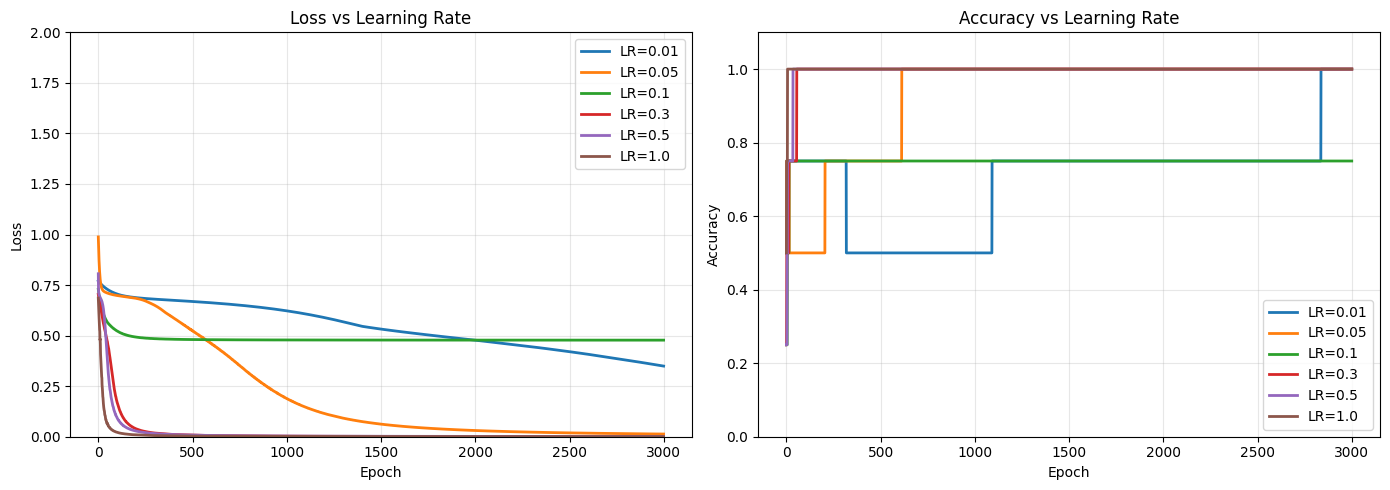

In [ ]:
# Visualize learning rate impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
for lr, results in lr_results.items():
    ax1.plot(results['losses'], label=f'LR={lr}', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs Learning Rate')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 2])

# Accuracy curves
for lr, results in lr_results.items():
    ax2.plot(results['accuracies'], label=f'LR={lr}', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs Learning Rate')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## HIỆN THỰC BÀI TOÁN BẰNG PYTORCH
- Class `MLPPyTorch`: Kế thừa từ `nn.Module`, định nghĩa architecture 2→hidden→1
- Layers: `fc1` (input→hidden), `fc2` (hidden→output) sử dụng `nn.Linear`
- Activations: Lựa chọn linh hoạt giữa ReLU, Sigmoid, Tanh cho hidden layer
- Output: Sigmoid activation để đảm bảo output trong khoảng [0, 1] cho binary classification
- Forward pass: Tự động xử lý bởi PyTorch's autograd system

In [ ]:
class MLPPyTorch(nn.Module):
    def __init__(self, hidden_size=4, activation='relu'):
        super(MLPPyTorch, self).__init__()

        self.fc1 = nn.Linear(2, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

        # Select activation
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'tanh':
            self.activation = nn.Tanh()

        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        h = self.activation(self.fc1(x))
        out = self.output_activation(self.fc2(h))
        return out

def train_pytorch(hidden_size=4, activation='relu', epochs=3000, learning_rate=0.1):
    """Train PyTorch model"""
    # Convert to tensors
    X_torch = torch.FloatTensor(X)
    y_torch = torch.FloatTensor(y)

    # Create model
    model = MLPPyTorch(hidden_size, activation)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_torch)
        loss = criterion(y_pred, y_torch)
        losses.append(loss.item())

        # Calculate accuracy
        predictions = (y_pred >= 0.5).float()
        accuracy = (predictions == y_torch).float().mean().item()
        accuracies.append(accuracy)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch:4d}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.4f}")

    return model, losses, accuracies

print("PyTorch MLP class defined successfully!")

PyTorch MLP class defined successfully!


## HUẤN LUYỆN VỚI PYTORCH
- Loss function: `nn.BCELoss()` cho binary cross entropy
- Optimizer: `optim.SGD` với learning rate có thể điều chỉnh (default 0.1)
- Training loop:
  - Forward pass: `y_pred = model(X_torch)`
  - Compute loss: `loss = criterion(y_pred, y_torch)`
  - Backward pass: `optimizer.zero_grad()` → `loss.backward()` → `optimizer.step()`
- Metrics tracking: Lưu loss và accuracy mỗi epoch để phân tích
- Predictions: Sử dụng threshold 0.5 và `torch.no_grad()` context để evaluate

In [ ]:
# Train PyTorch model
print("Training PyTorch MLP on XOR...\n")

model_torch, losses_torch, accuracies_torch = train_pytorch(
    hidden_size=4,
    activation='relu',
    epochs=3000,
    learning_rate=0.1
)

# Test predictions
print("\n" + "="*50)
print("PyTorch Final Predictions:")
with torch.no_grad():
    X_torch = torch.FloatTensor(X)
    predictions_torch = (model_torch(X_torch) >= 0.5).int()
    for i in range(len(X)):
        print(f"  Input: {X[i]} → Predicted: {predictions_torch[i].item()}, True: {int(y[i][0])}")

final_accuracy_torch = (predictions_torch == torch.FloatTensor(y)).float().mean().item()
print(f"\nFinal Accuracy: {final_accuracy_torch * 100:.1f}%")

Training PyTorch MLP on XOR...

Epoch    0: Loss = 0.8065, Accuracy = 0.5000
Epoch  500: Loss = 0.3066, Accuracy = 1.0000
Epoch 1000: Loss = 0.0436, Accuracy = 1.0000
Epoch 1500: Loss = 0.0164, Accuracy = 1.0000
Epoch 2000: Loss = 0.0093, Accuracy = 1.0000
Epoch 2500: Loss = 0.0062, Accuracy = 1.0000
Epoch 2999: Loss = 0.0046, Accuracy = 1.0000

PyTorch Final Predictions:
  Input: [0. 0.] → Predicted: 0, True: 0
  Input: [0. 1.] → Predicted: 1, True: 1
  Input: [1. 0.] → Predicted: 1, True: 1
  Input: [1. 1.] → Predicted: 0, True: 0

Final Accuracy: 100.0%


## SO SÁNH TỐC ĐỘ GIỮA 2 CÁCH HIỆN THỰC: NUMPY VÀ PYTORCH
Từ kết quả benchmark, ta có thể thấy NumPy vượt trội hơn PyTorch đáng kể khi training trên dataset nhỏ như XOR.
- Qua 5 lần chạy, NumPy có thời gian training trung bình 0.3651s với độ lệch chuẩn thấp (0.0575s), cho thấy performance ổn định và nhanh.
- Ngược lại, PyTorch mất trung bình 2.1404s - chậm hơn gần 6 lần so với NumPy (speedup 0.17x), với độ biến động cao hơn (std = 0.3379s), đặc biệt run 4 tốn tới 2.816s.
- Cả hai implementation đều đạt accuracy 100% và converge tốt (loss cuối ~0.003-0.008), cho thấy không có sự khác biệt về chất lượng model.
- Nguyên nhân NumPy nhanh hơn là với 4 samples và 3000 epochs, overhead của PyTorch (graph building, GPU memory allocation, autograd system) chiếm tỷ trọng lớn so với computation time thực tế, trong khi NumPy thực thi trực tiếp các phép toán ma trận đơn giản trên CPU. Việc PyTorch có std cao (0.3379s) cũng phản ánh overhead không cố định từ system scheduling và memory management.
- Nhìn chung, với toy problems có ít data points như XOR, NumPy là lựa chọn tối ưu về tốc độ và đơn giản, trong khi PyTorch chỉ phát huy ưu thế khi scale lên datasets lớn (hàng nghìn/triệu samples) nhờ GPU acceleration và parallel processing.

In [ ]:
print("="*70)
print("Speed Comparison: NumPy vs PyTorch on XOR")
print("="*70)

n_runs = 5
numpy_times = []
pytorch_times = []

print("\nRunning benchmarks (5 runs each)...\n")

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}:")

    # NumPy
    model_numpy = MLPFromScratch(2, 8, 1, 'relu', 'he')
    start = time.time()
    model_numpy.train(X, y, epochs=3000, learning_rate=0.1, verbose=False)
    numpy_time = time.time() - start
    numpy_times.append(numpy_time)
    print(f"  NumPy:   {numpy_time:.4f}s")

    # PyTorch
    start = time.time()
    train_pytorch(hidden_size=8, activation='relu', epochs=3000, learning_rate=0.1)
    pytorch_time = time.time() - start
    pytorch_times.append(pytorch_time)
    print(f"  PyTorch: {pytorch_time:.4f}s")
    print()

print("="*70)
print("Results:")
print("="*70)
print(f"NumPy   - Mean: {np.mean(numpy_times):.4f}s, Std: {np.std(numpy_times):.4f}s")
print(f"PyTorch - Mean: {np.mean(pytorch_times):.4f}s, Std: {np.std(pytorch_times):.4f}s")
print(f"\nSpeedup: {np.mean(numpy_times)/np.mean(pytorch_times):.2f}x")

if np.mean(numpy_times) < np.mean(pytorch_times):
    print("NumPy is faster! (Small dataset, overhead dominates)")
else:
    print("PyTorch is faster! (Optimized backend)")

Speed Comparison: NumPy vs PyTorch on XOR

Running benchmarks (5 runs each)...

Run 1/5:
  NumPy:   0.3310s
Epoch    0: Loss = 0.6701, Accuracy = 0.5000
Epoch  500: Loss = 0.0477, Accuracy = 1.0000
Epoch 1000: Loss = 0.0138, Accuracy = 1.0000
Epoch 1500: Loss = 0.0073, Accuracy = 1.0000
Epoch 2000: Loss = 0.0048, Accuracy = 1.0000
Epoch 2500: Loss = 0.0035, Accuracy = 1.0000
Epoch 2999: Loss = 0.0027, Accuracy = 1.0000
  PyTorch: 1.9696s

Run 2/5:
  NumPy:   0.3093s
Epoch    0: Loss = 0.6855, Accuracy = 0.2500
Epoch  500: Loss = 0.0947, Accuracy = 1.0000
Epoch 1000: Loss = 0.0304, Accuracy = 1.0000
Epoch 1500: Loss = 0.0155, Accuracy = 1.0000
Epoch 2000: Loss = 0.0094, Accuracy = 1.0000
Epoch 2500: Loss = 0.0064, Accuracy = 1.0000
Epoch 2999: Loss = 0.0047, Accuracy = 1.0000
  PyTorch: 1.9803s

Run 3/5:
  NumPy:   0.3283s
Epoch    0: Loss = 0.6940, Accuracy = 0.5000
Epoch  500: Loss = 0.1826, Accuracy = 1.0000
Epoch 1000: Loss = 0.0387, Accuracy = 1.0000
Epoch 1500: Loss = 0.0192, Accu

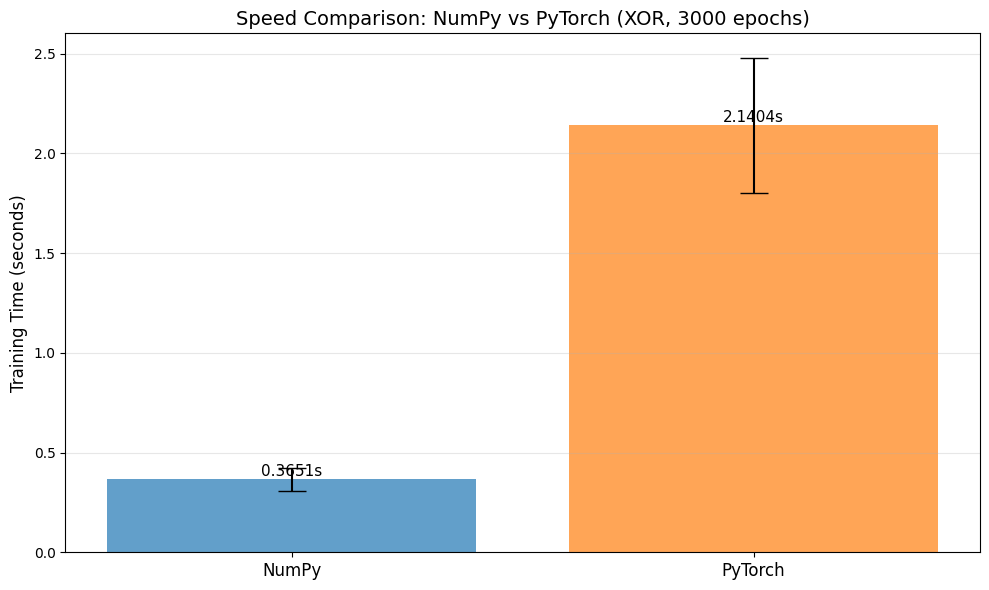

In [ ]:
# Visualize speed comparison
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(2)
means = [np.mean(numpy_times), np.mean(pytorch_times)]
stds = [np.std(numpy_times), np.std(pytorch_times)]
labels = ['NumPy', 'PyTorch']
colors = ['#1f77b4', '#ff7f0e']

bars = ax.bar(x_pos, means, yerr=stds, capsize=10, color=colors, alpha=0.7)
ax.set_ylabel('Training Time (seconds)', fontsize=12)
ax.set_title('Speed Comparison: NumPy vs PyTorch (XOR, 3000 epochs)', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, mean in zip(bars, means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{mean:.4f}s',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()